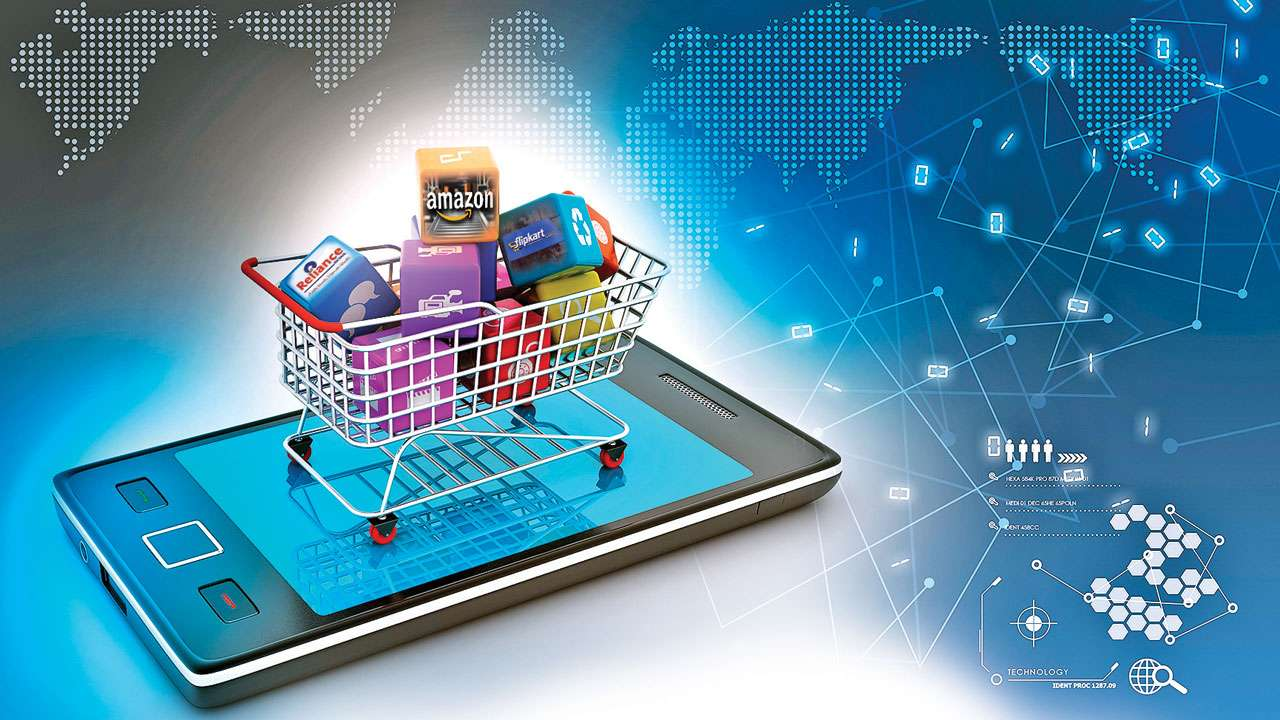


## The Challenge

You are part of a Data Scientists team from the All In One Place company, that needs to determine who are the clients eligible to participate of the “Insiders Program”. With this clients list on hand, the marketing team will a sequency of a custom and exclusive actions for this group, in order to rise the revenues and the purchase frequency. 
As result for this project is expected that you deliver a list with eligible clients to participate of the “Insiders Program”, as well a report answering the following questions:

1. Who are the elegible people to participate in the “Insiders Program”?
2. How many clients will be part of the group?
3. Which are the main caracteristics for the group?
4. Which is the revenues percentage that comes from the group?
5. Which are the expected revenues from this group for the next months?
6. Which are the conditions to a client be eligible for the “Insiders”?
7. Which are the conditions to a client be removed from the “Insiders”?
8. Which are the guarantees that the “Insiders Program” is better than the rest of the base?
9. Which actions the marketing team can perform in order to improve the income?

## The Data

The data set is available on the Kaggle platform, through this link:

https://www.kaggle.com/vik2012kvs/high-value-customers-identification

Each row represents a sell transaction that happened between November 2016 and December 2017. The dataset includes the following informations:

• **Invoice Number:** unique id from each purchase.

• **Stock Code Product:** item code.

• **Description Product:** item name.

• **Quantity:** the quantity of each item purchased per transaction.

• **Invoice Date:** the day that the purchase occurred.

• **Unit Price:** product price per unit.

• **Customer ID:** client id.

• **Country:** the client country.

## Soluction Planning

# Imports, Configurations and Helper Functions

## Imports

In [16]:
import plotly
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Configurations

In [17]:
warnings.filterwarnings('ignore')

SEED = 43

%matplotlib inline
%pylab inline

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['font.size'] = 18

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.expand_frame_repr', False)

sns.set()

plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot

Populating the interactive namespace from numpy and matplotlib


<function plotly.offline.offline.iplot(figure_or_data, show_link=False, link_text='Export to plot.ly', validate=True, image=None, filename='plot_image', image_width=800, image_height=600, config=None, auto_play=True, animation_opts=None)>

## Helper Functions

## Load Data

In [18]:
data_path = r'C:\Users\felip\repos\pa005_insiders_clustering\insiders_clustering\data\raw\Ecommerce.csv'

df_init = pd.read_csv(data_path)
df_init.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


## Data Fist Look

In [19]:
print(f'\nROWS: {df_init.shape[0]}\n\nCOLUMNS: {df_init.shape[1]}.\n')


ROWS: 541909

COLUMNS: 9.



In [20]:
df_init.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Unnamed: 8     541909
dtype: int64

In [21]:
df_init.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
Unnamed: 8     float64
dtype: object

In [22]:
df_init.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0
Unnamed: 8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### First Look Summary.

<span style="color:blue">1. The columns "Unnamed: 8" have no value to the dataset and should be droped.<span>
    
<span style="color:blue">2. The columns are in a weird order - reorder the columns..<span>
    
<span style="color:blue">3. The column "InvoiceDate" should be "DATE" type.<span>
    
<span style="color:yellow">4. The columns "InvoiceNo" should be "INT" type.<span>
    
<span style="color:yellow">5. There are some NaN values at the "Description" and "CustomerID".<span>    

## Data Cleaning

In [23]:
df_init_2 = df_init.copy()

### <span style="color:blue">1. The columns "Unnamed: 8" have no value to the dataset and should be droped.<span> - DONE

In [24]:
df_init_2.drop(columns = 'Unnamed: 8', inplace = True)

In [25]:
df_init_2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


### <span style="color:blue">2. The columns are in a weird order - reorder the columns.<span> - DONE

In [26]:
df_init_2 = df_init_2[['CustomerID', 'Country', 'InvoiceDate','InvoiceNo', 'Description', 'UnitPrice', 'StockCode', 'Quantity']]
df_init_2.head()

,CustomerID,Country,InvoiceDate,InvoiceNo,Description,UnitPrice,StockCode,Quantity
0,17850.0,United Kingdom,29-Nov-16,536365,WHITE HANGING HEART T-LIGHT HOLDER,2.55,85123A,6
1,17850.0,United Kingdom,29-Nov-16,536365,WHITE METAL LANTERN,3.39,71053,6
2,17850.0,United Kingdom,29-Nov-16,536365,CREAM CUPID HEARTS COAT HANGER,2.75,84406B,8
3,17850.0,United Kingdom,29-Nov-16,536365,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,84029G,6
4,17850.0,United Kingdom,29-Nov-16,536365,RED WOOLLY HOTTIE WHITE HEART.,3.39,84029E,6


### <span style="color:blue">3. The column "InvoiceDate" should be "DATE" type.<span> - DONE

In [27]:
df_init_2['InvoiceDate'] = pd.to_datetime(df_init_2['InvoiceDate'])

In [28]:
df_init_2.dtypes

CustomerID            float64
Country                object
InvoiceDate    datetime64[ns]
InvoiceNo              object
Description            object
UnitPrice             float64
StockCode              object
Quantity                int64
dtype: object

In [29]:
df_init_2.head()

,CustomerID,Country,InvoiceDate,InvoiceNo,Description,UnitPrice,StockCode,Quantity
0,17850.0,United Kingdom,2016-11-29,536365,WHITE HANGING HEART T-LIGHT HOLDER,2.55,85123A,6
1,17850.0,United Kingdom,2016-11-29,536365,WHITE METAL LANTERN,3.39,71053,6
2,17850.0,United Kingdom,2016-11-29,536365,CREAM CUPID HEARTS COAT HANGER,2.75,84406B,8
3,17850.0,United Kingdom,2016-11-29,536365,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,84029G,6
4,17850.0,United Kingdom,2016-11-29,536365,RED WOOLLY HOTTIE WHITE HEART.,3.39,84029E,6


### <span style="color:yellow">4. The columns "InvoiceNo" should be "INT" type.<span> - PENDING
    
    - It was found some codes like "C536379" and it cant be directly tranformed into "INT" type.
    - The "C" before the numbers represents a "Discount" description.
    
<span style="color:red">Try to find a way to use this feature later.<span>

In [30]:
# df_init_2['InvoiceNo'] = df_init_2['InvoiceNo'].astype(int)

In [31]:
df_init_2.set_index('InvoiceNo').loc['C536379']

CustomerID                 14527.0
Country             United Kingdom
InvoiceDate    2016-11-29 00:00:00
Description               Discount
UnitPrice                     27.5
StockCode                        D
Quantity                        -1
Name: C536379, dtype: object

In [39]:
df_init_2.set_index('Description').loc['Discount'].head()

,CustomerID,Country,InvoiceDate,InvoiceNo,UnitPrice,StockCode,Quantity
Description,,,,,,,
Discount,14527.0,United Kingdom,2016-11-29,C536379,27.50,D,-1
Discount,14527.0,United Kingdom,2016-12-03,C537164,29.29,D,-1
Discount,15498.0,United Kingdom,2016-12-05,C537597,281.00,D,-1
Discount,17340.0,United Kingdom,2016-12-06,C537857,267.12,D,-1
Discount,16422.0,United Kingdom,2016-12-13,C538897,5.76,D,-1


In [33]:
print(f'There are {len(df_init_2.set_index("Description").loc["Discount"])} rows with "Discount" InvoiceNo "C" code, and maybe other types of InvoiceNo with letters')

There are 77 rows with "Discount" InvoiceNo "C" code, and maybe other types of InvoiceNo with letters


In [34]:
print(f'There are {len(df_init_2["Description"].unique())} diferent unique products descriptions.')
print(f'There are {len(df_init_2["StockCode"].unique())} diferent unique stock codes.')
print(f'There are {len(df_init_2["InvoiceNo"].unique())} diferent unique Invoice Numbers.')

There are 4224 diferent unique products descriptions.
There are 4070 diferent unique stock codes.
There are 25900 diferent unique Invoice Numbers.


### <span style="color:yellow">5. There are some NaN values at the "Description" and "CustomerID".<span> - PENDING
    
    - There are 135080 NaNs at the CustomerID column, almost 25% of all the dataset.
<span style="color:red">**WHAT TO DO WITH IT?**<span> 
    
    OPTIONS:
    - input an ID for these customers based on the invoice number - each invoice number belongs to a customer.

In [35]:
df_init_2.isna().sum()

CustomerID     135080
Country             0
InvoiceDate         0
InvoiceNo           0
Description      1454
UnitPrice           0
StockCode           0
Quantity            0
dtype: int64

In [36]:
print(f'There are {df_init_2["CustomerID"].isna().sum()} rows with no data at the CustomerID column - ' 
      f'{round(df_init_2["CustomerID"].isna().sum()/len(df_init_2)*100, 2)}% of all dataset.')

There are 135080 rows with no data at the CustomerID column - 24.93% of all dataset.


In [37]:
print(f'There are {len(df_init_2["CustomerID"].unique())} unique customers ID in the dataset.')
print(f'There are {len(df_init_2["InvoiceNo"].unique())} invoice numbers in the dataset.')

There are 4373 unique customers ID in the dataset.
There are 25900 invoice numbers in the dataset.


In [59]:
df_customer_NaN = df_init_2.set_index('CustomerID').loc[NaN]
df_customer_NaN.shape

(135080, 7)

In [67]:
df_customer_NaN['InvoiceNo'].value_counts().count()

3710

<span style="color:orange">If we consider that each purchase number represents a client, there are 3710 diferent clients with NaN, so, maybe, we can associate the InvoiceNo to a client and replace the NaN with a new client ID.<span>

In [48]:
display(df_init_2.head())
display(df_init_2.tail())

,CustomerID,Country,InvoiceDate,InvoiceNo,Description,UnitPrice,StockCode,Quantity
0,17850.0,United Kingdom,2016-11-29,536365,WHITE HANGING HEART T-LIGHT HOLDER,2.55,85123A,6
1,17850.0,United Kingdom,2016-11-29,536365,WHITE METAL LANTERN,3.39,71053,6
2,17850.0,United Kingdom,2016-11-29,536365,CREAM CUPID HEARTS COAT HANGER,2.75,84406B,8
3,17850.0,United Kingdom,2016-11-29,536365,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,84029G,6
4,17850.0,United Kingdom,2016-11-29,536365,RED WOOLLY HOTTIE WHITE HEART.,3.39,84029E,6


,CustomerID,Country,InvoiceDate,InvoiceNo,Description,UnitPrice,StockCode,Quantity
541904,12680.0,France,2017-12-07,581587,PACK OF 20 SPACEBOY NAPKINS,0.85,22613,12
541905,12680.0,France,2017-12-07,581587,CHILDREN'S APRON DOLLY GIRL,2.10,22899,6
541906,12680.0,France,2017-12-07,581587,CHILDRENS CUTLERY DOLLY GIRL,4.15,23254,4
541907,12680.0,France,2017-12-07,581587,CHILDRENS CUTLERY CIRCUS PARADE,4.15,23255,4
541908,12680.0,France,2017-12-07,581587,BAKING SET 9 PIECE RETROSPOT,4.95,22138,3


# Work Diary

30/03/2021 - Kick off PA05.

    - done data load.
    - done first look at the data.
    - done some data cleaning.
        - found some issues with NaN in the data.
        
            - InvoiceNo.
            - CustomerID.
            - Description.
            

31/03/2021 - Git config + ClientID NaN problem.

    - Done GitLab configurations.
    - Openned my branch at GitLab repo.
    
    - Try to figure out how to use the NaN CustomerID - I do not want to drop them.
        - had an idea - use the Invoice Number to relate the purchases with the NaN clients, so we can input a clientID for each Invoice Number.
<span style="color:yellow">            - We can input the new CustomerID numbers above the CustomerID.max() - 18287.0 - but it can also create fake clients.